In [103]:
from sklearn.datasets import load_boston 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
plt.style.use('seaborn')
boston = load_boston()
boston_data = boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
boston_data['MEDV'] = boston.target
boston_data

c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [104]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']

In [105]:
from sklearn.linear_model import SGDRegressor
sgd_lr_lstat = SGDRegressor(random_state=42)
sgd_lr_lstat.fit(X=X, y=y)



SGDRegressor(random_state=42)

In [106]:
print(f'Wo coef: {sgd_lr_lstat.intercept_}')
print(f'W1 coef: {sgd_lr_lstat.coef_}')

Wo coef: [34.33010969]
W1 coef: [-0.96193242]


c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\mblyz\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


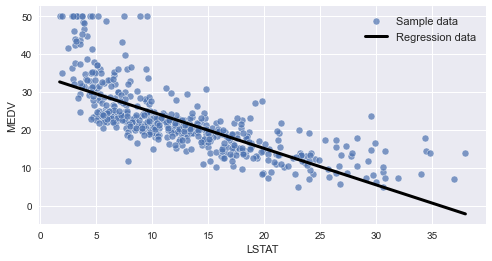

In [107]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, axes = plt.subplots(figsize=(8,4))
    sns.scatterplot(X, y_true, ax=axes, alpha=0.7, label='Sample data')
    sns.lineplot(X, y_predict, ax=axes, color='black', linewidth=3, label='Regression data')
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.legend(facecolor='yellow', fontsize=11)
y_predict = sgd_lr_lstat.predict(X)
plot_regression_2d(boston_data['LSTAT'], y, y_predict)

In [108]:
metrics.r2_score(y, y_predict)

0.5424034698377067

In [109]:
X = boston_data.drop('MEDV', axis=1)

`Ошибка!!` данные не масштабированы

In [110]:
sgd_lr_full = SGDRegressor(random_state=42)
sgd_lr_full.fit(X, y)

SGDRegressor(random_state=42)

In [111]:
w_df = pd.DataFrame({"Features":boston_data.drop('MEDV', axis=1).columns,
                     "Coefs": sgd_lr_full.coef_})
intercept = pd.DataFrame({'Features': "INTERCEPT",
                          "Coefs": sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept], ignore_index=True)
coef_df

,Features,Coefs
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


In [112]:
y_full_predict = sgd_lr_full.predict(X)

In [113]:
print(f'R2 score{metrics.r2_score(y, y_full_predict) :.3f}')

R2 score-10590303862129979358707712.000


In [134]:
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_std.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [233]:
sgd_lr_full_std = SGDRegressor(random_state=42,learning_rate='adaptive', eta0=0.01, tol=0.0001)
sgd_lr_full_std.fit(X_std, y)
w_df = pd.DataFrame({'Features': X.columns, 
                     'Coefs': sgd_lr_full_std.coef_})
intercept_df = pd.DataFrame({'Features': 'INTERCEPT', 
                     'Coefs': sgd_lr_full_std.intercept_})
coef_std_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_std_df

,Features,Coefs
0,CRIM,-0.940835
1,ZN,1.087627
2,INDUS,0.120208
3,CHAS,0.683116
4,NOX,-2.069438
5,RM,2.667263
6,AGE,0.012519
7,DIS,-3.134509
8,RAD,2.665446
9,TAX,-2.062419


In [234]:
y_full_predict_std = sgd_lr_full_std.predict(X_std)
print(f'R2 score on SGDregressor {metrics.r2_score(y, y_full_predict_std)}')

R2 score on SGDregressor 0.7406377507300701
